In [ ]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [ ]:
# Load Data Viz Pkgs
import seaborn as sns

In [ ]:
pip install neattext


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.1 MB/s eta 0:00:00


In [ ]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [ ]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CoVidSenti.csv')

In [ ]:
df.head()

Unnamed: 0  Emotion                                               Text
0           0  neutral                                             Why ? 
1           1      joy    Sage Act upgrade on my to do list for tommorow.
2           2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3           3      joy   Such an eye ! The true hazel eye-and so brill...
4           4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...

In [ ]:
df.shape

(34792, 3)

In [ ]:
df.dtypes

Unnamed: 0     int64
Emotion       object
Text          object
dtype: object

In [ ]:
df.isnull().sum()

Unnamed: 0    0
Emotion       0
Text          0
dtype: int64

In [ ]:
# Value Counts
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

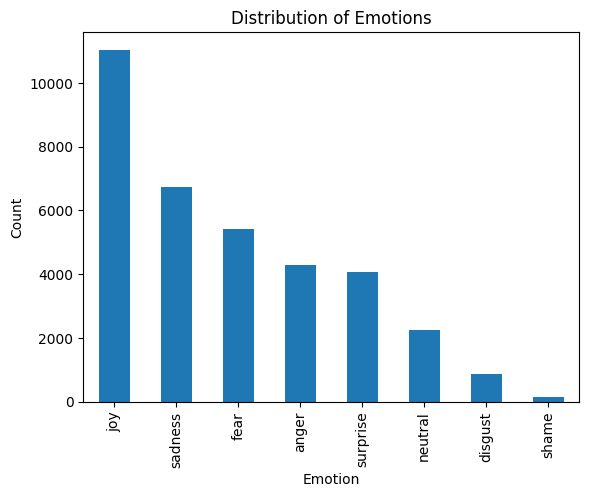

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df['Emotion'].value_counts().plot(kind='bar')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions')
plt.show()


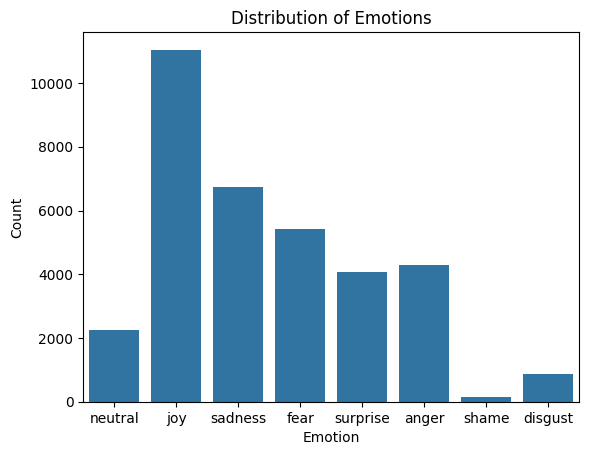

In [ ]:
import seaborn as sns

# Assuming df is your DataFrame
sns.countplot(x='Emotion', data=df)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions')
plt.show()


In [ ]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [ ]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [ ]:
df

Unnamed: 0   Emotion  \
0               0   neutral   
1               1       joy   
2               2   sadness   
3               3       joy   
4               4       joy   
...           ...       ...   
34787       34787  surprise   
34788       34788       joy   
34789       34789     anger   
34790       34790      fear   
34791       34791   sadness   

                                                    Text  \
0                                                 Why ?    
1        Sage Act upgrade on my to do list for tommorow.   
2      ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3       Such an eye ! The true hazel eye-and so brill...   
4      @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   
...                                                  ...   
34787  @MichelGW have you gift! Hope you like it! It'...   
34788  The world didnt give it to me..so the world MO...   
34789                           A man robbed me today .    
34790  Youu call it JEALOUSY, I call it of #Losing YO...   
34791  I think about you baby, and I dream about you ...   

                                              Clean_Text  
0                                                      ?  
1                        Sage Act upgrade list tommorow.  
2      WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...  
3      eye ! true hazel eye-and brilliant ! Regular f...  
4      ugh babe.. hugggzzz u .! babe naamazed nga ako...  
...                                                  ...  
34787    gift! Hope like it! hand wear ! It'll warm! Lol  
34788    world didnt me..so world DEFINITELY cnt away!!!  
34789                                 man robbed today .  
34790                      Youu JEALOUSY, #Losing YOU...  
34791                             think baby, dream time  

[34792 rows x 4 columns]

In [ ]:
import string

print(string.punctuation)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
def remove_punctuations(text):
  punctuations = string.punctuation
  return text .translate(str.maketrans('','',punctuations))

In [ ]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(remove_punctuations)

In [ ]:
df

Unnamed: 0   Emotion  \
0               0   neutral   
1               1       joy   
2               2   sadness   
3               3       joy   
4               4       joy   
...           ...       ...   
34787       34787  surprise   
34788       34788       joy   
34789       34789     anger   
34790       34790      fear   
34791       34791   sadness   

                                                    Text  \
0                                                 Why ?    
1        Sage Act upgrade on my to do list for tommorow.   
2      ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3       Such an eye ! The true hazel eye-and so brill...   
4      @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   
...                                                  ...   
34787  @MichelGW have you gift! Hope you like it! It'...   
34788  The world didnt give it to me..so the world MO...   
34789                           A man robbed me today .    
34790  Youu call it JEALOUSY, I call it of #Losing YO...   
34791  I think about you baby, and I dream about you ...   

                                              Clean_Text  
0                                                         
1                         Sage Act upgrade list tommorow  
2      WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...  
3      eye  true hazel eyeand brilliant  Regular feat...  
4      ugh babe hugggzzz u  babe naamazed nga ako e b...  
...                                                  ...  
34787         gift Hope like it hand wear  Itll warm Lol  
34788         world didnt meso world DEFINITELY cnt away  
34789                                  man robbed today   
34790                           Youu JEALOUSY Losing YOU  
34791                              think baby dream time  

[34792 rows x 4 columns]

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
  return " ".join([word for word in text.split() if word not in STOPWORDS])

In [ ]:
df['Clean_Text'] = df['Clean_Text'].apply(lambda x: remove_stopwords(x))
df.head()

Unnamed: 0  Emotion                                               Text  \
0           0  neutral                                             Why ?    
1           1      joy    Sage Act upgrade on my to do list for tommorow.   
2           2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3           3      joy   Such an eye ! The true hazel eye-and so brill...   
4           4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   

                                          Clean_Text  
0                                                     
1                     Sage Act upgrade list tommorow  
2  WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...  
3  eye true hazel eyeand brilliant Regular featur...  
4  ugh babe hugggzzz u babe naamazed nga ako e ba...

In [ ]:
from collections import Counter
word_count = Counter()
for text in df['Clean_Text']:
  for word in text.split():
    word_count[word] += 1

word_count.most_common(10)

[('Im', 1744),
 ('time', 1565),
 ('day', 1414),
 ('like', 1382),
 ('love', 1258),
 ('today', 1248),
 ('amp', 1194),
 ('tomorrow', 1094),
 ('got', 941),
 ('work', 935)]

In [ ]:
FREQUENT_WORDS = set(word for (word, wc) in word_count.most_common(10))
def remove_freq_words(text):
  return " ".join([word for word in text.split() if word not in FREQUENT_WORDS])

In [ ]:
df['Clean_Text'] = df['Clean_Text'].apply(lambda x: remove_freq_words(x))
df.head()

Unnamed: 0  Emotion                                               Text  \
0           0  neutral                                             Why ?    
1           1      joy    Sage Act upgrade on my to do list for tommorow.   
2           2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3           3      joy   Such an eye ! The true hazel eye-and so brill...   
4           4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   

                                          Clean_Text  
0                                                     
1                     Sage Act upgrade list tommorow  
2  WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...  
3  eye true hazel eyeand brilliant Regular featur...  
4  ugh babe hugggzzz u babe naamazed nga ako e ba...

In [ ]:
RARE_WORDS = set(word for (word, wc) in word_count.most_common()[:-10:-1])
RARE_WORDS

{'Cornet',
 'Oscar',
 'cabeça',
 'dancei',
 'danço',
 'kkkk',
 'munitores',
 'upbought',
 'vino'}

In [ ]:
def remove_rare_words(text):
  return " ".join([word for word in text.split() if word not in RARE_WORDS])

In [ ]:
df['Clean_Text'] = df['Clean_Text'].apply(lambda x: remove_rare_words(x))
df.head()

Unnamed: 0  Emotion                                               Text  \
0           0  neutral                                             Why ?    
1           1      joy    Sage Act upgrade on my to do list for tommorow.   
2           2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3           3      joy   Such an eye ! The true hazel eye-and so brill...   
4           4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   

                                          Clean_Text  
0                                                     
1                     Sage Act upgrade list tommorow  
2  WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...  
3  eye true hazel eyeand brilliant Regular featur...  
4  ugh babe hugggzzz u babe naamazed nga ako e ba...

In [ ]:
import re
def remove_spl_chars(text):
  text = re.sub('[^a-zA-Z0-9]',' ',text)
  text = re.sub('\s+', ' ', text)
  return text

In [ ]:
df['Clean_Text'] = df['Clean_Text'].apply(lambda x: remove_spl_chars(x))
df.head()

Unnamed: 0  Emotion                                               Text  \
0           0  neutral                                             Why ?    
1           1      joy    Sage Act upgrade on my to do list for tommorow.   
2           2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3           3      joy   Such an eye ! The true hazel eye-and so brill...   
4           4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   

                                          Clean_Text  
0                                                     
1                     Sage Act upgrade list tommorow  
2  WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...  
3  eye true hazel eyeand brilliant Regular featur...  
4  ugh babe hugggzzz u babe naamazed nga ako e ba...

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stem_words(text):
  return " ".join([ps.stem(word) for word in text.split()])

In [ ]:
df['Clean_Text'] = df['Clean_Text'].apply(lambda x: stem_words(x))
df.head()

Unnamed: 0  Emotion                                               Text  \
0           0  neutral                                             Why ?    
1           1      joy    Sage Act upgrade on my to do list for tommorow.   
2           2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3           3      joy   Such an eye ! The true hazel eye-and so brill...   
4           4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   

                                          Clean_Text  
0                                                     
1                      sage act upgrad list tommorow  
2  way homegirl babi funer man hate funer show bless  
3  eye true hazel eyeand brilliant regular featur...  
4  ugh babe hugggzzz u babe naamaz nga ako e babe...

In [ ]:
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

def lemmatize_words(text):
  pos_text = pos_tag(text.split())
  return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_text])

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
df['Clean_Text'] = df['Clean_Text'].apply(lambda x: lemmatize_words(x))
df.head()

Unnamed: 0  Emotion                                               Text  \
0           0  neutral                                             Why ?    
1           1      joy    Sage Act upgrade on my to do list for tommorow.   
2           2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3           3      joy   Such an eye ! The true hazel eye-and so brill...   
4           4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   

                                          Clean_Text  
0                                                     
1                      sage act upgrad list tommorow  
2  way homegirl babi funer man hate funer show bless  
3  eye true hazel eyeand brilliant regular featur...  
4  ugh babe hugggzzz u babe naamaz nga ako e babe...

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
def tokenize_text(text):
    return word_tokenize(text)
df['tokens'] = df['Clean_Text'].apply(tokenize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df.head()

Unnamed: 0  Emotion                                               Text  \
0           0  neutral                                             Why ?    
1           1      joy    Sage Act upgrade on my to do list for tommorow.   
2           2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3           3      joy   Such an eye ! The true hazel eye-and so brill...   
4           4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   

                                          Clean_Text  \
0                                                      
1                      sage act upgrad list tommorow   
2  way homegirl babi funer man hate funer show bless   
3  eye true hazel eyeand brilliant regular featur...   
4  ugh babe hugggzzz u babe naamaz nga ako e babe...   

                                              tokens  
0                                                 []  
1                [sage, act, upgrad, list, tommorow]  
2  [way, homegirl, babi, funer, man, hate, funer,...  
3  [eye, true, hazel, eyeand, brilliant, regular,...  
4  [ugh, babe, hugggzzz, u, babe, naamaz, nga, ak...

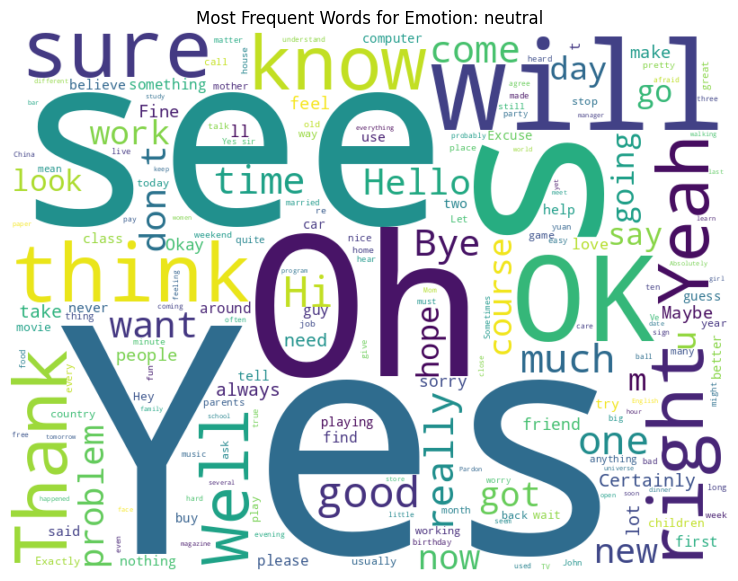

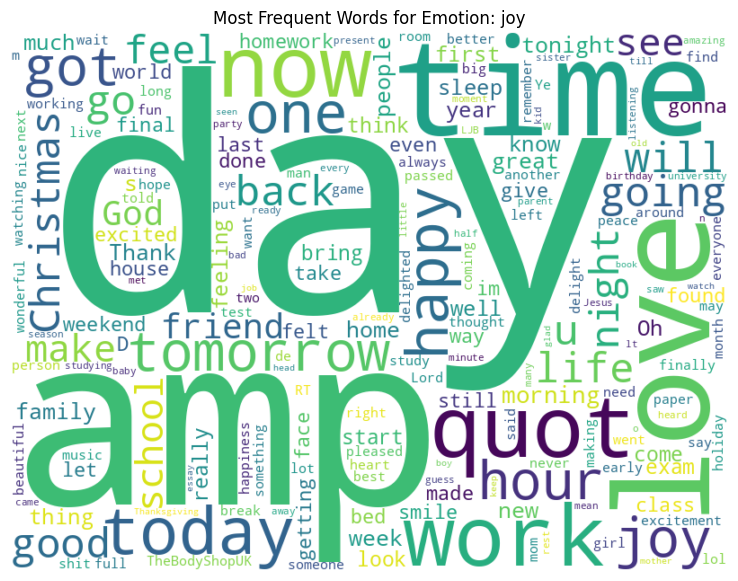

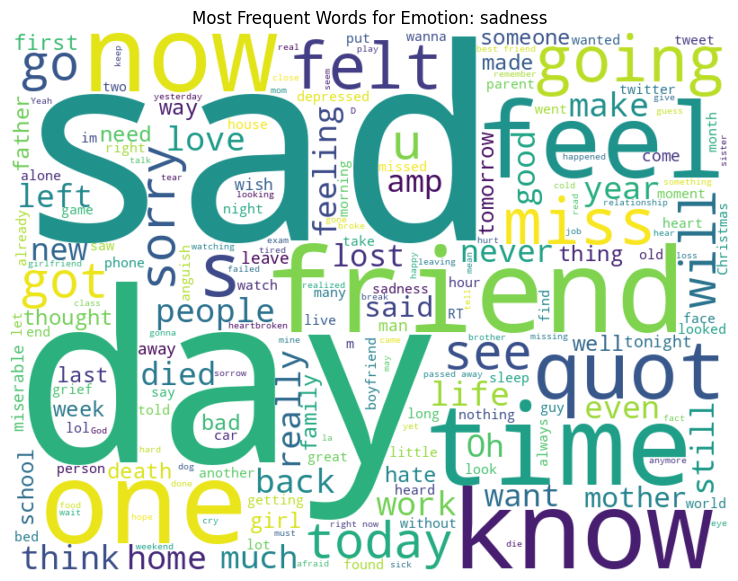

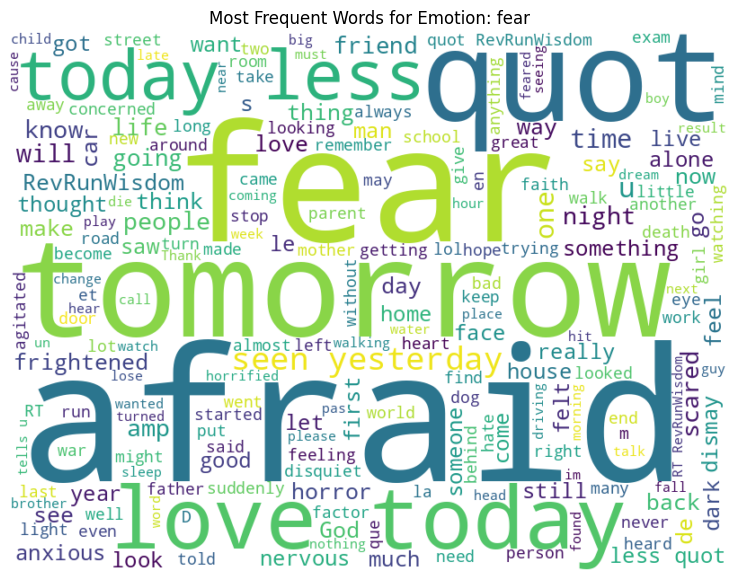

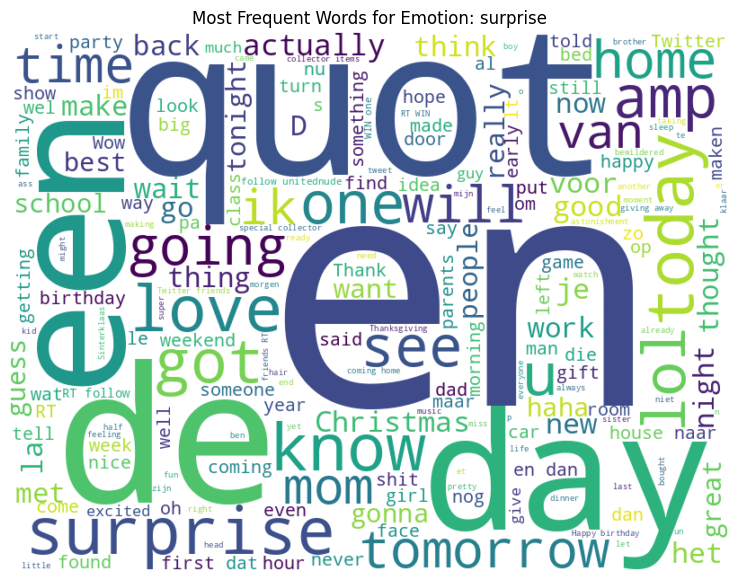

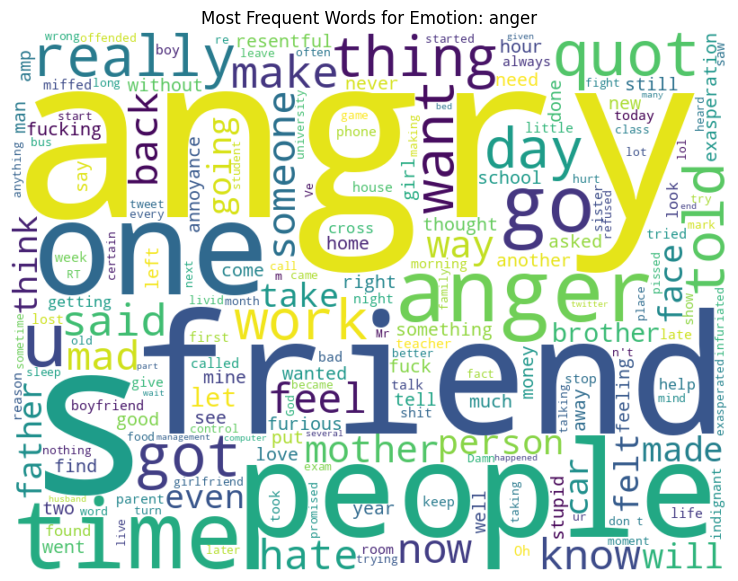

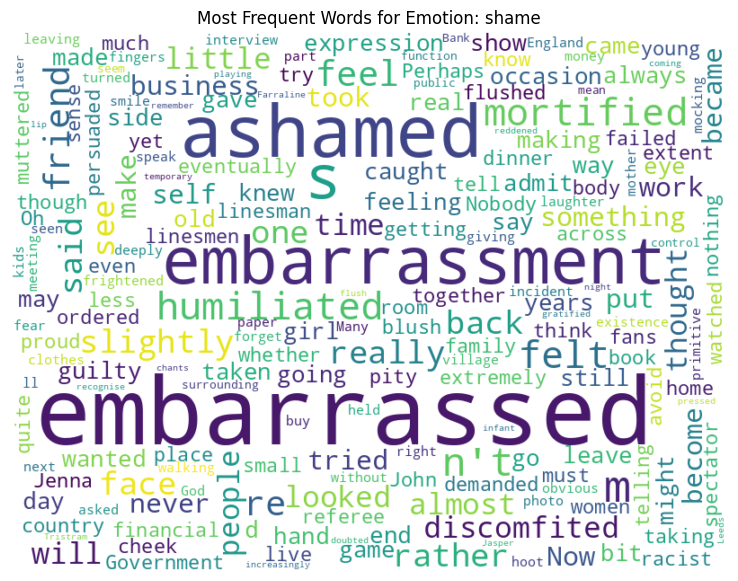

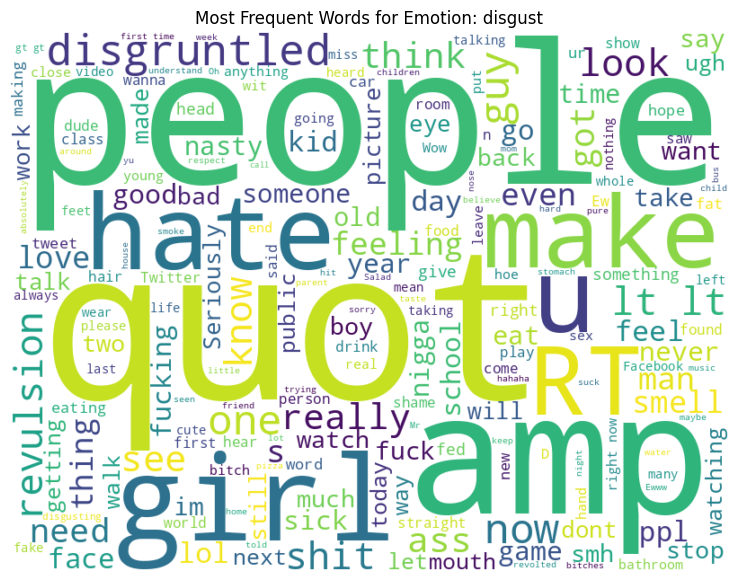

In [ ]:
# @title Most Frequent Words by Emotion

from wordcloud import WordCloud
import matplotlib.pyplot as plt

for emotion in df['Emotion'].unique():
    words = ' '.join(df[df['Emotion'] == emotion]['Text'].tolist())
    wordcloud = WordCloud(width=800, height=600, background_color='white').generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Frequent Words for Emotion: {emotion}')
    plt.show()

In [ ]:
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment = blob.sentiment.polarity
  if sentiment > 0:
    result = "Positive"
  elif sentiment < 0:
    result = "Negative"
  else:
    result = "Neutral"
  return result

In [ ]:
get_sentiment("I love coding")

'Positive'

In [ ]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [ ]:
df.head()

Unnamed: 0  Emotion                                               Text  \
0           0  neutral                                             Why ?    
1           1      joy    Sage Act upgrade on my to do list for tommorow.   
2           2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3           3      joy   Such an eye ! The true hazel eye-and so brill...   
4           4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   

                                          Clean_Text  \
0                                                      
1                      sage act upgrad list tommorow   
2  way homegirl babi funer man hate funer show bless   
3  eye true hazel eyeand brilliant regular featur...   
4  ugh babe hugggzzz u babe naamaz nga ako e babe...   

                                              tokens Sentiment  
0                                                 []   Neutral  
1                [sage, act, upgrad, list, tommorow]   Neutral  
2  [way, homegirl, babi, funer, man, hate, funer,...  Negative  
3  [eye, true, hazel, eyeand, brilliant, regular,...  Positive  
4  [ugh, babe, hugggzzz, u, babe, naamaz, nga, ak...   Neutral

In [ ]:
#compare emotion and sentiments
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

<Axes: xlabel='Emotion,Sentiment'>

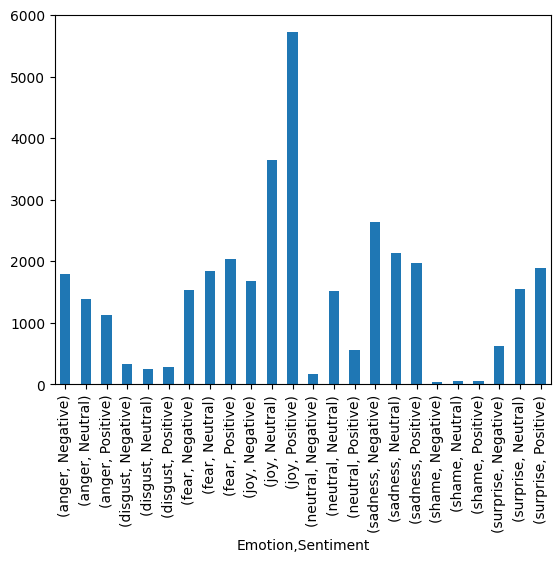

In [ ]:
#First method using matplotlib
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

In [ ]:
#Using seaborn
sns.catplot

<function seaborn.categorical.catplot(data=None, *, x=None, y=None, hue=None, row=None, col=None, kind='strip', estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, units=None, weights=None, order=None, hue_order=None, row_order=None, col_order=None, col_wrap=None, height=5, aspect=1, log_scale=None, native_scale=False, formatter=None, orient=None, color=None, palette=None, hue_norm=None, legend='auto', legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, ci=<deprecated>, **kwargs)>

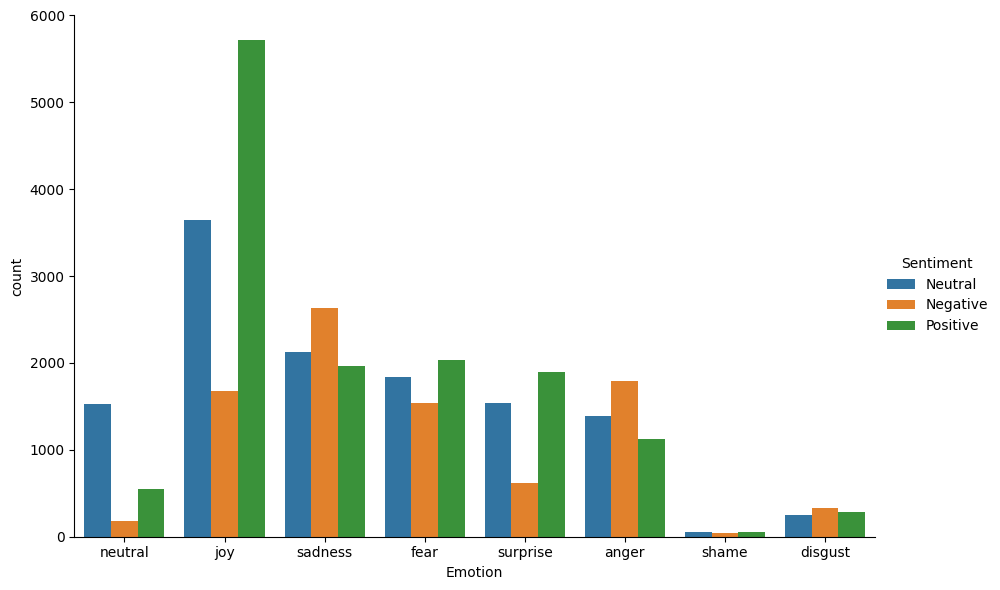

In [ ]:
sns.catplot(x='Emotion',hue='Sentiment',data=df,kind='count',height=6,aspect=1.5)

In [ ]:
#Keyword extraction
#->Extract the most commenest word per class of emotion

In [ ]:
from collections import Counter

In [ ]:
def extract_keywords(text, num = 50):
  tokens = [ tok for tok in text.split()]
  most_common_tokens = Counter(tokens).most_common(num)
  return dict(most_common_tokens)

In [ ]:
#list of emotions
emotion_list = df['Emotion'].unique().tolist()

In [ ]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [ ]:
joy_list = df[df['Emotion'] == 'joy']['Clean_Text'].tolist()

In [ ]:
#Joy Document
joy_docx = ' '.join(joy_list)

In [ ]:
joy_docx

'sage act upgrad list tommorow eye true hazel eyeand brilliant regular featur open counten complexion oh bloom health pretti height size firm upright figur health mere bloom air head glanc hear child pictur health give idea complet pictur grownup health loveli ugh babe hugggzzz u babe naamaz nga ako e babe e despit nega ma pinaramdam fil ko ang life leopold truli happi hope prayer belov son come fruition feel fail french fuckfrench goodlet fell x overnight felt confid selfesteem respons worthwhil terribl ecstat danger thing select studi univers yeah age pas ba exam class result heard select fot year univers zambia form chikola secondari school welp studi day head campu rain grad photo feel awesom bring ive buy christma present trawl load shop shit pant pure 100 gravi life leopold truli happi hope prayer belov son come fruition class jam paper quarter reason celebr though studi begin right cant wait sleep studi tonight night oh 3 essay due unpack finish homework choral concert appear so

In [ ]:
#Extract Keywords
keyword_joy=extract_keywords(joy_docx)

In [ ]:
keyword_joy

{'christma': 622,
 'happi': 606,
 'go': 520,
 'feel': 505,
 'good': 473,
 'joy': 446,
 'hour': 432,
 'come': 400,
 'night': 371,
 'school': 345,
 'morn': 338,
 'friend': 338,
 'home': 323,
 'life': 308,
 'week': 307,
 'year': 305,
 'look': 300,
 'excit': 298,
 'great': 293,
 'think': 292,
 'thank': 288,
 'final': 285,
 'love': 280,
 'start': 272,
 'find': 270,
 '2': 267,
 'day': 266,
 'get': 256,
 'god': 250,
 'famili': 245,
 'know': 244,
 'sleep': 241,
 'long': 234,
 'cant': 230,
 'delight': 230,
 'thing': 229,
 'new': 226,
 'peopl': 225,
 'tonight': 221,
 'studi': 213,
 'oh': 209,
 'wait': 201,
 'u': 197,
 'bring': 193,
 'work': 193,
 'break': 192,
 'meet': 191,
 'let': 190,
 'exam': 186,
 'want': 183}

In [ ]:
#Plot
def plot_most_common_words(mydict,emotion_name):
  df_01 = pd.DataFrame(mydict.items(), columns=['tokens','count'])
  plt.figure(figsize=(20,10))
  plt.title("Plot of {} Most common keywords".format(emotion_name))
  sns.barplot(x='tokens',y='count',data= df_01)
  plt.xticks(rotation=45)
  plt.show()

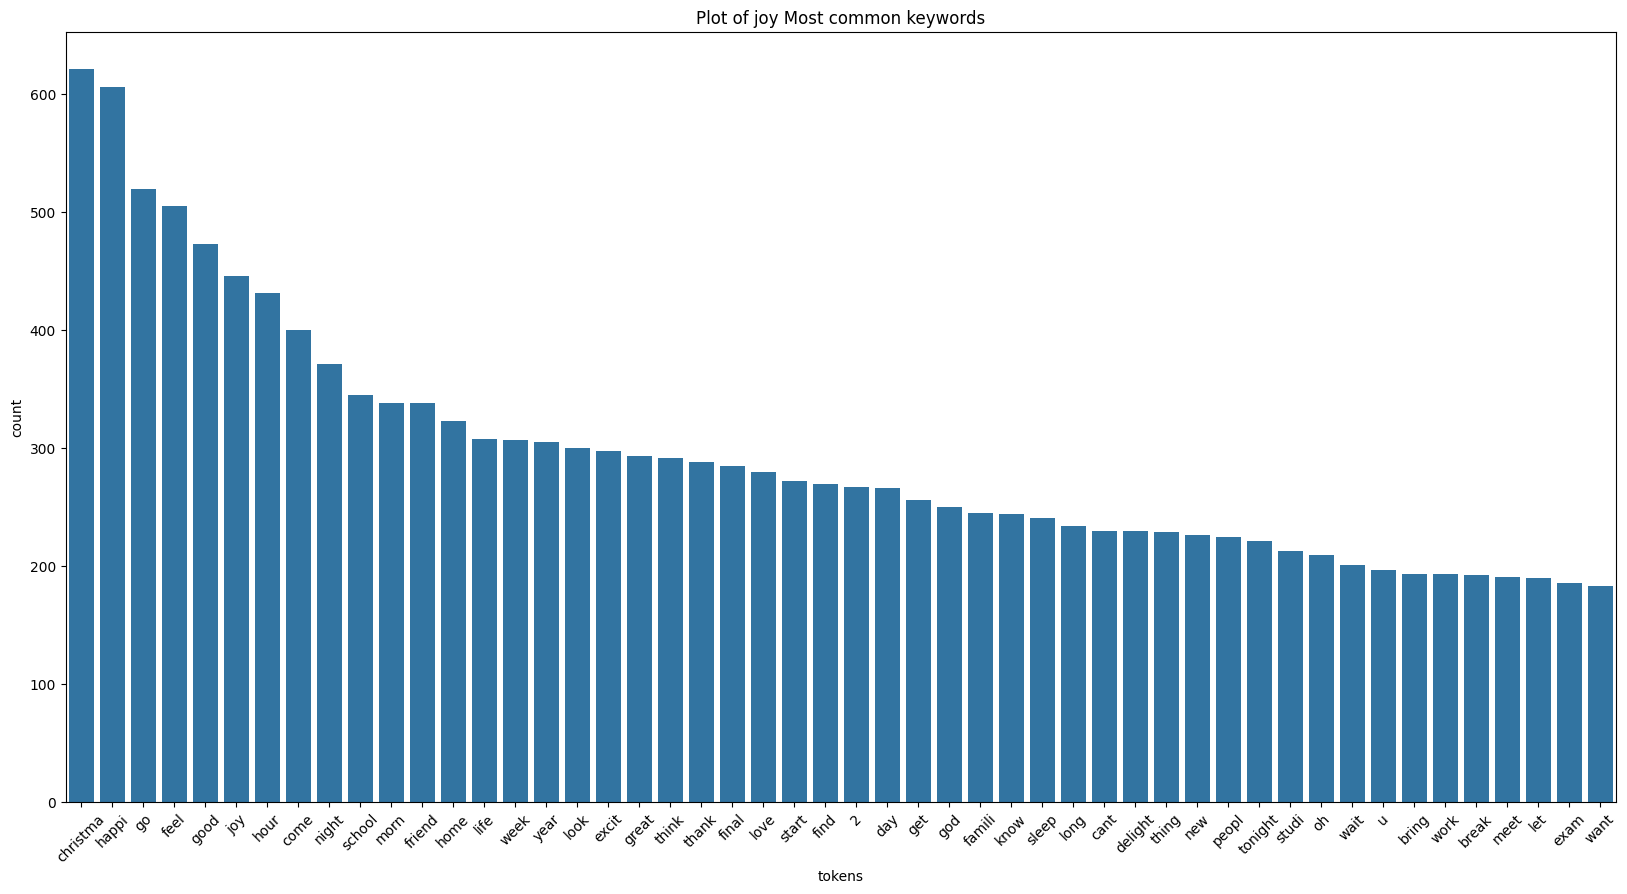

In [ ]:
plot_most_common_words(keyword_joy,"joy")


In [ ]:
surprise_list = df[df['Emotion'] == 'surprise']['Clean_Text'].tolist()

In [ ]:
#Document
surprise_docx = ' '.join(surprise_list)
#Extract Keywords
keyword_surprise = extract_keywords(surprise_docx)

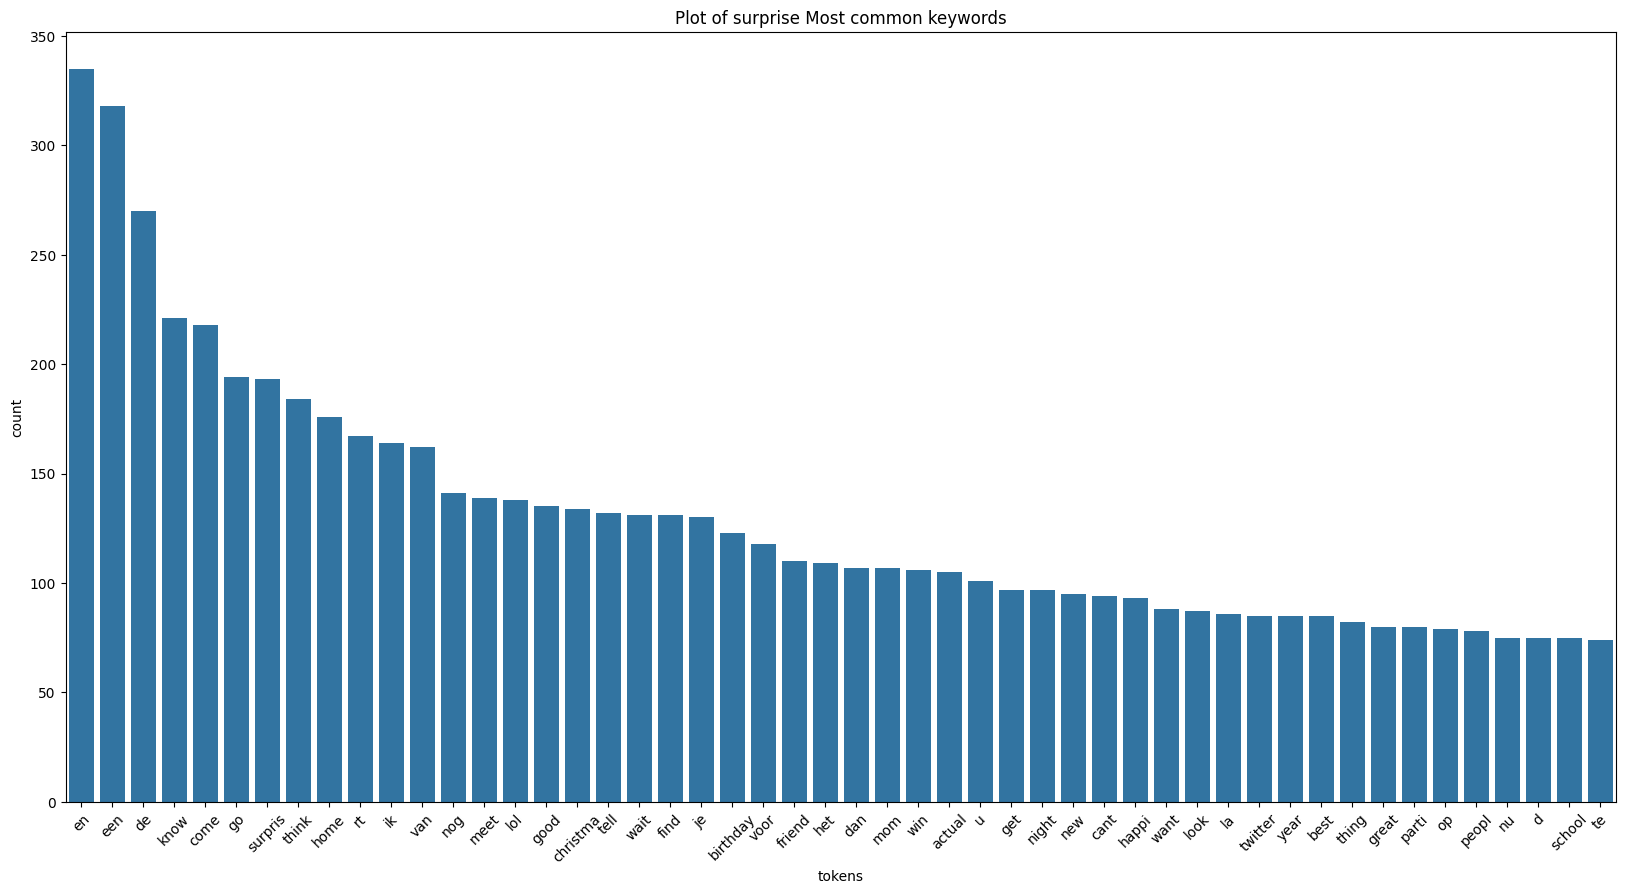

In [ ]:
plot_most_common_words(keyword_surprise,"surprise")


In [ ]:
#word cloud
from wordcloud import WordCloud

In [ ]:
def plot_wordcloud(docx):
  mywordcloud = WordCloud().generate(docx)
  plt.figure(figsize=(20,10))
  plt.imshow(mywordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

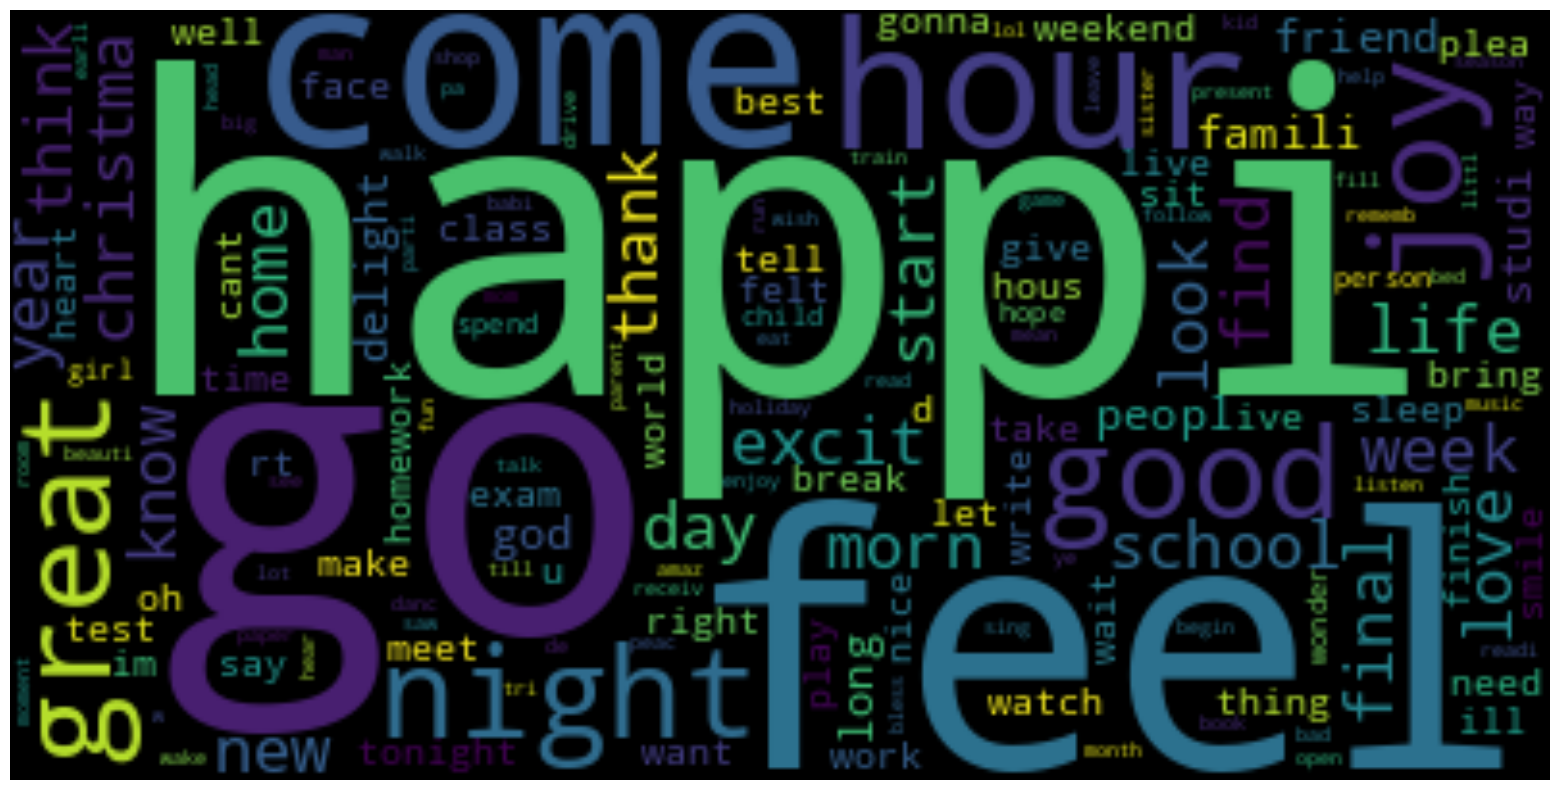

In [ ]:
plot_wordcloud(joy_docx)

In [ ]:
#Machine Learning
#Naive bayes
#LR
#KNN
#SVM

###COMPARE WITH SPARKNLP/ NLU JOHN SNOWS LAB

In [ ]:
#LOAD ML PKGS

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#VECTORIZER
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#METRICES
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [ ]:
#SPLIT OR DATASET
from sklearn.model_selection import train_test_split

In [ ]:
#BUILD FEATURES FROM OUT TEXT
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [ ]:
Xfeatures

0                                                         
1                            sage act upgrad list tommorow
2        way homegirl babi funer man hate funer show bless
3        eye true hazel eyeand brilliant regular featur...
4        ugh babe hugggzzz u babe naamaz nga ako e babe...
                               ...                        
34787                    gift hope hand wear itll warm lol
34788              world didnt meso world definit cnt away
34789                                              man rob
34790                               youu jealousi lose you
34791                                     think babi dream
Name: Clean_Text, Length: 34792, dtype: object

In [ ]:
#VECTORIZER
cv = CountVectorizer()
X =cv.fit_transform(Xfeatures)


In [ ]:
tfidf = TfidfVectorizer()
tfidf.fit(Xfeatures)

TfidfVectorizer()

In [ ]:
tfidf_X = tfidf.transform(Xfeatures)

In [ ]:
tfidf.get_feature_names_out()

array(['00', '000', '0235299130', ..., 'zz', 'zzap', 'zzzz'], dtype=object)

In [ ]:
#GET FEATURES BY NAME
cv.get_feature_names_out()


array(['00', '000', '0235299130', ..., 'zz', 'zzap', 'zzzz'], dtype=object)

In [ ]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#SPLIT DATASET
X_train, X_test, y_train, y_test = train_test_split(X,ylabels,test_size=0.3, random_state = 42)

In [ ]:
#BUILD OUR MODEL
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
#ACCURACY
#METHOD 1
clf.score(X_test,y_test)

0.6143897298333014

In [ ]:
y_pred_for_svm = clf.predict(X_test)

In [ ]:
y_pred_for_svm

array(['joy', 'anger', 'sadness', ..., 'sadness', 'anger', 'joy'],
      dtype=object)

In [ ]:
#MAKE A SINGLE PREDICTION
#VECTORIZED OUR TEXT
#APPLIED OUR MODEL

In [ ]:
sample_text = ["I love coding so much!"]

In [ ]:
vect = cv.transform(sample_text).toarray()

In [ ]:
clf.predict(vect)

array(['joy'], dtype=object)

In [ ]:
def predict_emotion(sample_text,model):
  myvect = cv.transform(sample_text).toarray()
  prediction = model.predict(myvect)
  print(prediction[0])
  return prediction[0]

In [ ]:
predict_emotion(sample_text,clf)

joy


'joy'

In [ ]:
#MODEL EVALUATION
print(classification_report(y_test, y_pred_for_svm))

              precision    recall  f1-score   support

       anger       0.68      0.47      0.56      1283
     disgust       0.90      0.03      0.06       292
        fear       0.84      0.60      0.70      1645
         joy       0.53      0.87      0.66      3311
     neutral       0.70      0.72      0.71       675
     sadness       0.62      0.51      0.56      2015
       shame       0.76      0.61      0.68        36
    surprise       0.72      0.33      0.45      1181

    accuracy                           0.61     10438
   macro avg       0.72      0.52      0.55     10438
weighted avg       0.66      0.61      0.60     10438



In [ ]:
#CONFUSION
cm = confusion_matrix(y_test,y_pred_for_svm)

In [ ]:
#PLOT CONFUSION MATRIX
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)

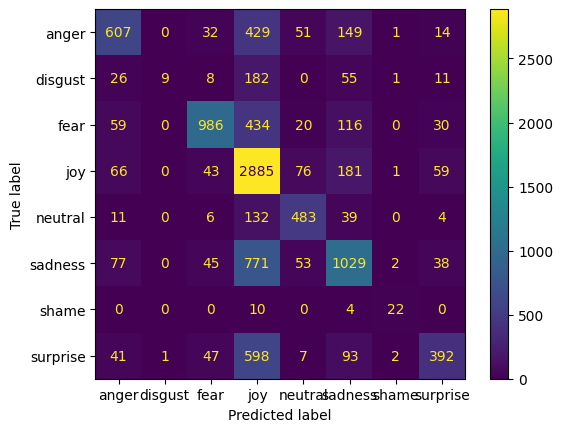

In [ ]:
disp.plot()

In [ ]:
#SPLIT DATASET USING TFIDF
X_train, X_test, y_train, y_test = train_test_split(tfidf_X,ylabels,test_size=0.3, random_state = 42)

In [ ]:
# Initialize the SVM classifier
svm_model = SVC(random_state=0)

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)


SVC(random_state=0)

In [ ]:
svm_model.score(X_test,y_test)

0.6184134891741713

In [ ]:
y_pred_for_svm1 = svm_model.predict(X_test)
y_pred_for_svm1

array(['fear', 'anger', 'sadness', ..., 'sadness', 'anger', 'joy'],
      dtype=object)

In [ ]:
#MAKE A SINGLE PREDICTION
#VECTORIZED OUR TEXT
#APPLIED OUR MODEL

In [ ]:
sample_text = ["I love coding so much!"]
vect1 = tfidf.transform(sample_text).toarray()
svm_model.predict(vect1)


array(['joy'], dtype=object)

In [ ]:
def predict_emotion(sample_text,model):
  myvect = tfidf.transform(sample_text).toarray()
  prediction = model.predict(myvect)
  print(prediction[0])
  return prediction[0]

In [ ]:
predict_emotion(sample_text,svm_model)

joy


'joy'

In [ ]:
#MODEL EVALUATION
print(classification_report(y_test, y_pred_for_svm1))
#CONFUSION
cm = confusion_matrix(y_test,y_pred_for_svm1)

              precision    recall  f1-score   support

       anger       0.70      0.50      0.59      1283
     disgust       0.93      0.04      0.08       292
        fear       0.84      0.62      0.71      1645
         joy       0.52      0.89      0.66      3311
     neutral       0.86      0.53      0.66       675
     sadness       0.62      0.53      0.57      2015
       shame       0.80      0.67      0.73        36
    surprise       0.76      0.33      0.46      1181

    accuracy                           0.62     10438
   macro avg       0.76      0.51      0.56     10438
weighted avg       0.68      0.62      0.60     10438



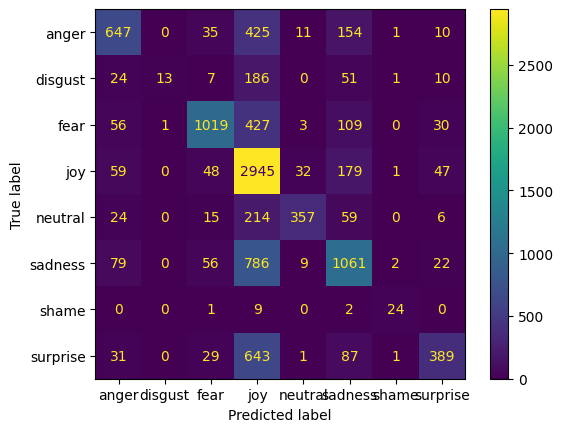

In [ ]:
#PLOT CONFUSION MATRIX
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_model.classes_)
disp.plot()

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr_model.score(X_test,y_test)

0.6147729450086223

In [ ]:
predict_emotion(sample_text, lr_model)

joy


'joy'